In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

### Read Dataset

In [2]:
dswifi = pd.read_csv("../../wifi_data.csv",sep=',')

In [3]:
dswifi.head()

,WifiAccessPoint_0,WifiAccessPoint_1,WifiAccessPoint_2,WifiAccessPoint_3,WifiAccessPoint_4,WifiAccessPoint_5,WifiAccessPoint_6,WifiAccessPoint_7,WifiAccessPoint_8,WifiAccessPoint_9,...,WifiAccessPoint_84,WifiAccessPoint_85,WifiAccessPoint_86,WifiAccessPoint_87,WifiAccessPoint_88,WifiAccessPoint_89,WifiAccessPoint_90,x,y,location_coded
0,-125,-65.0,-67.0,-71.0,NaN,-71.0,-74.0,-48.0,-91.0,-39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.220686,0.692311,location_3626775
1,-121,NaN,-76.0,NaN,-79.0,-81.0,-72.0,-66.0,-74.0,-56.0,...,-89.0,NaN,NaN,NaN,NaN,NaN,NaN,0.356841,0.707761,location_3627737
2,-130,NaN,-98.0,NaN,NaN,NaN,NaN,-75.0,NaN,-74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.271492,0.395226,location_3626772
3,-125,-49.0,-56.0,-63.0,-63.0,-47.0,-69.0,-70.0,-73.0,-68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.413128,0.860029,location_3628699
4,-117,NaN,-75.0,-82.0,NaN,NaN,NaN,NaN,NaN,-82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324798,0.107172,location_3627731


### Check Data
* WIFI strength is in negative. I beleive **WIFI strength sounds in dbm** means small negative is higher than larger negative (Refer to https://www.metageek.com/training/resources/wifi-signal-strength-basics.html)
* Some strength are NULL. I believe **NULL means no signal** plans to assign a very negative value. But for plotting, just fill 0
* 23 records misses X/Y
* I beleive PCF will make model more efficient, need test
* location_coded looks a very good encoding for the position. we shall use this for classification modelling. 
* it sounds a idea to create a lookup between X/Y and location_coded, so once classifed, can be reversed back to X/Y
* not very sure how to structure it as regression problem. But maybe we can pipeline two models, the first model is for X, and second model is for Y, and the output of the first model will be sent to 2nd model, as additional feature. This strucutre need more study.
* A good paper discuss indoor positioning http://noiselab.ucsd.edu/ECE228_2019/Reports/Report27.pdf

In [4]:
dswifi.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853 entries, 0 to 3852
Data columns (total 94 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WifiAccessPoint_0   3853 non-null   int64  
 1   WifiAccessPoint_1   2885 non-null   float64
 2   WifiAccessPoint_2   3421 non-null   float64
 3   WifiAccessPoint_3   2293 non-null   float64
 4   WifiAccessPoint_4   1929 non-null   float64
 5   WifiAccessPoint_5   2230 non-null   float64
 6   WifiAccessPoint_6   2190 non-null   float64
 7   WifiAccessPoint_7   2608 non-null   float64
 8   WifiAccessPoint_8   2242 non-null   float64
 9   WifiAccessPoint_9   3393 non-null   float64
 10  WifiAccessPoint_10  1578 non-null   float64
 11  WifiAccessPoint_11  2444 non-null   float64
 12  WifiAccessPoint_12  1653 non-null   float64
 13  WifiAccessPoint_13  3323 non-null   float64
 14  WifiAccessPoint_14  3341 non-null   float64
 15  WifiAccessPoint_15  2579 non-null   float64
 16  WifiAc

In [5]:
dswifi.location_coded.nunique()

93

In [6]:
dswifi.describe()

,WifiAccessPoint_0,WifiAccessPoint_1,WifiAccessPoint_2,WifiAccessPoint_3,WifiAccessPoint_4,WifiAccessPoint_5,WifiAccessPoint_6,WifiAccessPoint_7,WifiAccessPoint_8,WifiAccessPoint_9,...,WifiAccessPoint_83,WifiAccessPoint_84,WifiAccessPoint_85,WifiAccessPoint_86,WifiAccessPoint_87,WifiAccessPoint_88,WifiAccessPoint_89,WifiAccessPoint_90,x,y
count,3853.000000,2885.000000,3421.000000,2293.000000,1929.000000,2230.000000,2190.000000,2608.000000,2242.000000,3393.000000,...,40.000000,24.000000,16.000000,12.000000,4.00000,4.000000,12.000000,8.000000,3830.000000,3830.000000
mean,-126.509992,-70.085269,-69.830751,-67.711295,-67.214101,-71.913453,-75.331507,-68.036043,-75.550847,-70.144415,...,-89.425000,-89.083333,-85.937500,-87.000000,-80.75000,-89.500000,-84.500000,-90.875000,0.532630,0.504617
std,5.060149,12.032363,12.010631,10.309497,10.437340,13.884195,9.257825,9.879260,9.212177,11.612418,...,5.047911,6.177918,5.065817,4.572646,7.36546,5.196152,6.171783,2.997022,0.236462,0.279598
min,-145.000000,-105.000000,-104.000000,-96.000000,-92.000000,-103.000000,-106.000000,-97.000000,-103.000000,-105.000000,...,-101.000000,-99.000000,-93.000000,-93.000000,-88.00000,-95.000000,-95.000000,-95.000000,0.025027,0.023188
25%,-130.000000,-79.000000,-79.000000,-75.000000,-75.000000,-83.000000,-82.000000,-75.000000,-82.000000,-78.000000,...,-93.000000,-92.250000,-89.250000,-89.250000,-86.50000,-92.750000,-86.500000,-92.750000,0.354860,0.279469
50%,-126.000000,-70.000000,-70.000000,-68.000000,-68.000000,-74.000000,-76.000000,-69.000000,-76.000000,-71.000000,...,-90.000000,-90.000000,-86.000000,-88.000000,-81.00000,-90.000000,-85.500000,-90.500000,0.564801,0.501801
75%,-123.000000,-62.000000,-61.000000,-61.000000,-61.000000,-61.000000,-69.000000,-62.000000,-69.000000,-62.000000,...,-86.000000,-87.750000,-83.500000,-84.500000,-75.25000,-86.750000,-81.000000,-88.750000,0.692138,0.753799
max,-107.000000,-29.000000,-29.000000,-34.000000,-27.000000,-30.000000,-46.000000,-36.000000,-40.000000,-33.000000,...,-79.000000,-71.000000,-76.000000,-78.000000,-73.00000,-83.000000,-75.000000,-87.000000,0.935176,0.988379


In [7]:
dswifi.iloc[:,:-3].min().min()

-145.0

### Clean data
* For plotting, remove missing X/Y
* Fill -500 as no signal

In [8]:
dswifiplot = dswifi[~dswifi.x.isnull() & ~dswifi.y.isnull()].copy()

In [9]:
#dswifiplot.fillna(-500, inplace=True)
dswifiplot.fillna(0, inplace=True)

In [10]:
dswifiplot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3830 entries, 0 to 3852
Data columns (total 94 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WifiAccessPoint_0   3830 non-null   int64  
 1   WifiAccessPoint_1   3830 non-null   float64
 2   WifiAccessPoint_2   3830 non-null   float64
 3   WifiAccessPoint_3   3830 non-null   float64
 4   WifiAccessPoint_4   3830 non-null   float64
 5   WifiAccessPoint_5   3830 non-null   float64
 6   WifiAccessPoint_6   3830 non-null   float64
 7   WifiAccessPoint_7   3830 non-null   float64
 8   WifiAccessPoint_8   3830 non-null   float64
 9   WifiAccessPoint_9   3830 non-null   float64
 10  WifiAccessPoint_10  3830 non-null   float64
 11  WifiAccessPoint_11  3830 non-null   float64
 12  WifiAccessPoint_12  3830 non-null   float64
 13  WifiAccessPoint_13  3830 non-null   float64
 14  WifiAccessPoint_14  3830 non-null   float64
 15  WifiAccessPoint_15  3830 non-null   float64
 16  WifiAc

### Plot data

In [11]:
x = dswifiplot.iloc[:,:-3].values* (-1)
df = pd.DataFrame(x.sum(axis=1), columns = ['wifiStrength'])

In [12]:
np.mean(x),np.std(x)

(17.7700427509827, 32.76055038342206)

In [13]:
df.head()

,wifiStrength
0,1919.0
1,2008.0
2,1598.0
3,1690.0
4,1497.0


In [14]:
df['x'] = dswifiplot['x'].values*100
df['y'] = dswifiplot['y'].values*100

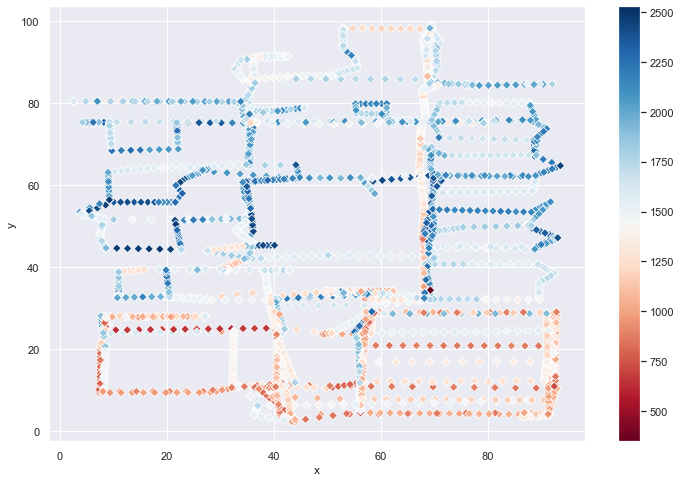

In [15]:
sns.set()
norm = plt.Normalize(df['wifiStrength'].min(), df['wifiStrength'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
fig, ax = plt.subplots(figsize=(12,8)) 
ax = sns.scatterplot(x='x', y='y', data=df, marker='D', palette='RdBu', hue='wifiStrength', ax=ax)

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.show()

### Explore PCA 
To do

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [17]:
x = dswifiplot.iloc[:,:-3].values
x = StandardScaler().fit_transform(x) # normalizing the features
#x = MinMaxScaler().fit_transform(x) # normalizing the features
x.shape

(3830, 91)

In [18]:
pca = PCA(n_components=10)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.12566425 0.05740502 0.04622599 0.03272362 0.03044802 0.02740885
 0.02336064 0.02324189 0.02187811 0.02141064]
